In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# Class 11: Introduction to Dynamic Optimization: A Two-Period Model Cake-Eating Problem

## Preferences

Let $C_0$ denote the quantity of cake consumed in period 0 and let $C_1$ denote the quantity consumed in period 1. The person's utility in period 0 from consuming $C_0$ and $C_1$ is given by:

\begin{align}
U(C_0,C_1) & = \log C_0 + \beta \log C_1,
\end{align}

where $0\leqslant\beta\leqslant 1$ is the person's *subjective discount factor*. $U$ is an *intertemporal utility function* and $\log C$ is the *flow* of utility generated each period. The presence of $\beta$ indicates the the person places lower weight on consumption in the future. The utility function implies indifference curves of the form:

\begin{align}
C_1 & =  e^{ \frac{\bar{U} - \log C_0}{\beta}},
\end{align}

where $\bar{U}$ is some given level of utility.

### Example: Plot Indifference Curves for Different Utility Levels

For $C_0$ between 0.01 and 10 and $\beta=0.95$, plot indifference curves for $\bar{U}=1, 2, 3, 4$. Set x- and y-axis limits to [0,10].

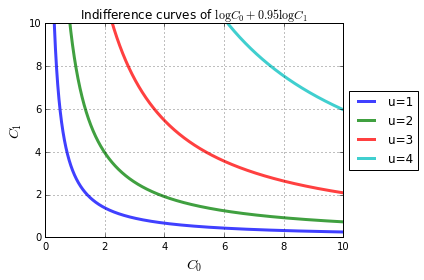

In [2]:
# Define a function for computing c1 given beta value and array of c0 values
def indifference_curve(u,beta,c0):

    return np.exp((u-np.log(c0))/beta)

# Create variable called 'c0' that stores c0 values from 0.01 to 10
c0 = np.arange(0.01,10,0.001)

# Create a variable called 'beta' that stores the value of beta
beta = 0.95

# Plot indifference curves
plt.plot(c0,indifference_curve(u=1,beta=beta,c0=c0),lw=3,alpha=0.75,label='u=1')
plt.plot(c0,indifference_curve(u=2,beta=beta,c0=c0),lw=3,alpha=0.75,label='u=2')
plt.plot(c0,indifference_curve(u=3,beta=beta,c0=c0),lw=3,alpha=0.75,label='u=3')
plt.plot(c0,indifference_curve(u=4,beta=beta,c0=c0),lw=3,alpha=0.75,label='u=4')

plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('$C_0$',fontsize=14)
plt.ylabel('$C_1$',fontsize=14)
plt.title('Indifference curves of $\log C_0 + 0.95 \log C_1$')

# Place legend to right of figure. PROVIDED
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid()
plt.tight_layout()

### Example: Plot Indifference Curves for Different $\beta$ Values


For $C_0$ between 0.01 and 10 and $\bar{U} = 3$, plot indifference curves for $\beta=1, 0.95,0.5,0.25$. Set x-axis limits to [0,10] and y-axis limits to [0,30].

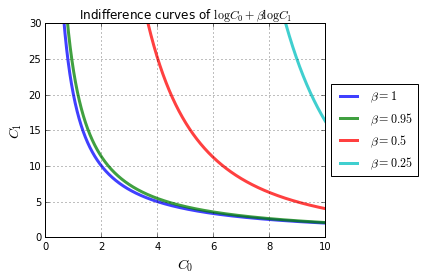

In [3]:
# Create a variable called u that stores the value of utility for the indifference curves
u = 3

plt.plot(c0,indifference_curve(u=u,beta=1,c0=c0),lw=3,alpha=0.75,label='$\\beta=1$')
plt.plot(c0,indifference_curve(u=u,beta=0.95,c0=c0),lw=3,alpha=0.75,label='$\\beta=0.95$')
plt.plot(c0,indifference_curve(u=u,beta=0.5,c0=c0),lw=3,alpha=0.75,label='$\\beta=0.5$')
plt.plot(c0,indifference_curve(u=u,beta=0.25,c0=c0),lw=3,alpha=0.75,label='$\\beta=0.25$')

plt.xlim([0,10])
plt.ylim([0,30])
plt.xlabel('$C_0$',fontsize=14)
plt.ylabel('$C_1$',fontsize=14)
plt.title('Indifference curves of $\log C_0 + \\beta \log C_1$')

# Place legend to right of figure. PROVIDED
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid()
plt.tight_layout()

## Budget Constraints and the Boundary Condition

Let $K_t$ denote the quantity of cake available in period $t$ and let $K_0$ denote the initial quantity of cake. The cake neither grows nor depreciates over time so the person faces the following budget constraints each period:

\begin{align}
C_0 & =  K_0 - K_1\\
C_1 & =  K_1 - K_2.
\end{align}

Finally, the person's problem is subject to a *boundary condition* that imposes a limit on the endpoint of the problem. Since the person only consumes cake in periods 0 and 1, there is no value in leaving leftover cake at the end of period 1. This reasoning implies the boundary condition:

\begin{align}
K_2 & = 0.
\end{align}

The boundary condition allows us to eliminate $K_2$ from the period 1 budget constraint. Combining the two budget constraints to eliminate $K_1$ implies an *intertemporal budget constraint* that links consumption in period 0 with consumption in period 1:

\begin{align}
C_0 & =  K_0 - C_1.
\end{align}

Notice that the implied price of $C_0$ in terms of $C_1$ is 1.

### Example: Plot the Intertemporal Budget Constraint

For $C_0$ between 0.01 and 20 and plot indifference curves for $K_0=5, 10, 15, 20$. Set x-axis limits to [0,10] and y-axis limits to [0,30].

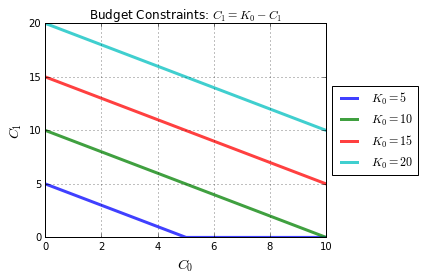

In [4]:
# Define a function for computing c1 given beta value and array of c0 values
def bc(k0,c0):

    k1 = k0-c0
    k1[k1<0]=0
    return k1

# Create variable called 'c0' that stores c0 values from 0.01 to 10
c0 = np.arange(0.01,10,0.001)

# Plot budget constraints
plt.plot(c0,bc(5,c0),lw=3,alpha=0.75,label='$K_0=5$')
plt.plot(c0,bc(10,c0),lw=3,alpha=0.75,label='$K_0=10$')
plt.plot(c0,bc(15,c0),lw=3,alpha=0.75,label='$K_0=15$')
plt.plot(c0,bc(20,c0),lw=3,alpha=0.75,label='$K_0=20$')

plt.xlabel('$C_0$',fontsize=14)
plt.ylabel('$C_1$',fontsize=14)
plt.title('Budget Constraints: $C_1 = K_0 - C_1$')

# Place legend to right of figure. PROVIDED
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid()
plt.tight_layout()

## Optimization


The person's problem is to choose $C_0$, $C_1$, $K_1$, and $K_2$ to maximize his utility subject to the two budget constraints and the boundary condition. However, the problem can be simplified considerably. Use the boundary condition to eliminate $K_2$ from the budget constraints. Then use the budget constraints to substitute $C_0$ and $C_1$ out of the utility function. The result is an unconstrained optimization problem in $K_1$.

\begin{align}
\max_{K_1} \; \log (K_0 - K_1) + \beta \log K_1,
\end{align}

Take the derivative with respect to $K_1$ and set the derivative equal to zero to obtain the *first-order* or *optimality* condition:

\begin{align}
-\frac{1}{K_0 - K_1} + \frac{\beta}{K_1} & = 0.
\end{align}

Solve for $K_1$ to find the optimal cake holding for period 1:

\begin{align}
\boxed{K_1  = \frac{\beta}{1-\beta}K_0}
\end{align}

Then use the budget constraints to infer optimal cake consumption in period 0:
\begin{align}
\boxed{C_0  = \frac{1-2\beta}{1-\beta}K_0}
\end{align}

and period 1:

\begin{align}
\boxed{C_1  = \frac{\beta}{1-\beta}K_0}.
\end{align}

Notice that $C_0 + C_1 = K_0$ so all of the cake is eaten by the end.

### Example: Solve for the Optimal Consumption Path

Compute $K_1, C_0, C_1$ for $\beta = 0.9$ and $k0 = 20$.

In [5]:
# Define a funciton that returns the solution to the two-period cake-eating problem
def two_period_cake(beta,k0):
    k1 = beta/(1+beta)*k0
    c0 = k0-k1
    c1 = k1
    
    return k1,c0,c1

# Create a cariable called 'k0' that stores initial cake value
k0 = 20

# Create a cariable called 'beta' that stores beta value
beta = 0.9

# Compute the optimal path
two_period_cake(beta=beta,k0=k0)

(9.473684210526317, 10.526315789473683, 9.473684210526317)